# Task a

In [7]:
from parameters import *
from functions import *
from PDE_solutions import *

walks = 5000
N = 200

1.0000000000000007


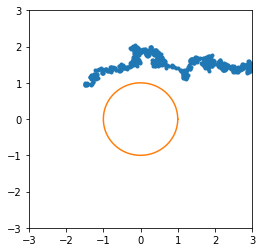

In [8]:
#np.random.seed(SEED) #scipy is based on the numpy seed
X, finalTime = NaiveRandomWalk(X0, 1000, T)

#plots the walk
plt.figure(figsize=[4,4])
X = X.T
plt.plot(X[0,:],X[1,:], '.-')
plt.xlim([-3,3])
plt.ylim([-3,3])

#plots the well
theta = np.linspace(0,2*np.pi,100)
plt.plot(R*np.cos(theta),R*np.sin(theta))
print(finalTime)

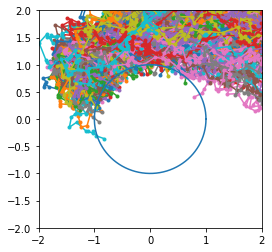

In [21]:
#plots a lot of walks
plt.figure(figsize=[4,4])
for i in range(300):
    X, finalTime = NaiveRandomWalk(X0, 100, T)
    X = X.T
    plt.plot(X[0,:],X[1,:], '.-')
plt.xlim([-2,2])
plt.ylim([-2,2])

#plots the well
theta = np.linspace(0,2*np.pi,100)
plt.plot(R*np.cos(theta),R*np.sin(theta))


# MC simulation

In [4]:
walks = 20000
N = [10,20,50,100,200,500,1000,2000,5000,10000]
X0 = [-1.5,1]
prob=[]
conf_int=[]
for n in N:
    print(n)
    mean, std, LB, UB = BasicMonteCarlo(X0,walks=walks, N=n, verbose=1)
    prob.append(mean)
    conf_int.append([LB,UB])
prob, conf_int

10

Number of simulations: 20000. Time needed = 5.44 s
Estimated variance: 0.4960655340282195
The estimated probability at [-1.5, 1] is: 0.5627 (using MC)
Confidence interval: [ 0.5627 +- 0.006875407315272031 ]	with P = 0.95%
20

Number of simulations: 20000. Time needed = 10.15 s
Estimated variance: 0.48707582791913123
The estimated probability at [-1.5, 1] is: 0.613 (using MC)
Confidence interval: [ 0.613 +- 0.006750811093795717 ]	with P = 0.95%
50

Number of simulations: 20000. Time needed = 25.09 s
Estimated variance: 0.4754453306250054
The estimated probability at [-1.5, 1] is: 0.6548 (using MC)
Confidence interval: [ 0.6548 +- 0.006589613831153973 ]	with P = 0.95%
100

Number of simulations: 20000. Time needed = 51.98 s
Estimated variance: 0.46755864932062563
The estimated probability at [-1.5, 1] is: 0.6772 (using MC)
Confidence interval: [ 0.6772 +- 0.006480305397864816 ]	with P = 0.95%
200

Number of simulations: 20000. Time needed = 104.98 s
Estimated variance: 0.462730378806

([0.5627,
  0.613,
  0.6548,
  0.6772,
  0.68945,
  0.69865,
  0.7086,
  0.7111,
  0.71605,
  0.7141],
 [[0.555824592684728, 0.569575407315272],
  [0.6062491889062043, 0.6197508110937957],
  [0.6482103861688461, 0.661389613831154],
  [0.6707196946021352, 0.6836803053978648],
  [0.6830366138378763, 0.6958633861621237],
  [0.6922903141215332, 0.7050096858784668],
  [0.7023018125331855, 0.7148981874668145],
  [0.7048178348987619, 0.717382165101238],
  [0.7098002471007268, 0.7222997528992732],
  [0.7078373689072368, 0.7203626310927631]])

In [5]:
walks = 20000
N = [10,20,50,100,200,500,1000,2000,5000,10000]
X0 = [-1.5, 2.]
prob=[]
conf_int=[]
for n in N:
    print(n)
    mean, std, LB, UB = BasicMonteCarlo(X0,walks=walks, N=n, verbose=1)
    prob.append(mean)
    conf_int.append([LB,UB])
prob, conf_int

10

Number of simulations: 20000. Time needed = 10.42 s
Estimated variance: 0.2295408339483903
The estimated probability at [-1.5, 2.0] is: 0.0558 (using MC)
Confidence interval: [ 0.0558 +- 0.0031814077387457423 ]	with P = 0.95%
20

Number of simulations: 20000. Time needed = 21.18 s
Estimated variance: 0.24653202409006647
The estimated probability at [-1.5, 2.0] is: 0.065 (using MC)
Confidence interval: [ 0.065 +- 0.0034169035452103202 ]	with P = 0.95%
50

Number of simulations: 20000. Time needed = 51.09 s
Estimated variance: 0.26508472418370277
The estimated probability at [-1.5, 2.0] is: 0.07605 (using MC)
Confidence interval: [ 0.07605 +- 0.0036740416876368392 ]	with P = 0.95%
100

Number of simulations: 20000. Time needed = 102.96 s
Estimated variance: 0.27573790375930995
The estimated probability at [-1.5, 2.0] is: 0.0829 (using MC)
Confidence interval: [ 0.0829 +- 0.003821693446851529 ]	with P = 0.95%
200

Number of simulations: 20000. Time needed = 228.55 s
Estimated variance

([0.0558,
  0.065,
  0.07605,
  0.0829,
  0.0882,
  0.09315,
  0.09255,
  0.0965,
  0.0967,
  0.0971],
 [[0.05261859226125426, 0.058981407738745745],
  [0.06158309645478968, 0.06841690354521032],
  [0.07237595831236317, 0.07972404168763685],
  [0.07907830655314847, 0.08672169344685153],
  [0.08426944097771166, 0.09213055902228834],
  [0.08912162962075644, 0.09717837037924355],
  [0.08853329626909441, 0.09656670373090558],
  [0.0924074125253488, 0.1005925874746512],
  [0.09260362716184901, 0.10079637283815097],
  [0.09299607252662913, 0.10120392747337088]])

In [6]:
walks = 20000
N = [10,20,50,100,200,500,1000,2000,5000,10000]
X0 = [-2, 0]
prob=[]
conf_int=[]
for n in N:
    print(n)
    mean, std, LB, UB = BasicMonteCarlo(X0,walks=walks, N=n, verbose=1)
    prob.append(mean)
    conf_int.append([LB,UB])
prob, conf_int

10

Number of simulations: 20000. Time needed = 3.85 s
Estimated variance: 0.2568312638969519
The estimated probability at [-2, 0] is: 0.929 (using MC)
Confidence interval: [ 0.929 +- 0.00355964974274392 ]	with P = 0.95%
20

Number of simulations: 20000. Time needed = 6.69 s
Estimated variance: 0.2225363197787746
The estimated probability at [-2, 0] is: 0.94775 (using MC)
Confidence interval: [ 0.94775 +- 0.0030843260334907363 ]	with P = 0.95%
50

Number of simulations: 20000. Time needed = 15.10 s
Estimated variance: 0.20093629903482718
The estimated probability at [-2, 0] is: 0.95785 (using MC)
Confidence interval: [ 0.95785 +- 0.002784952401488905 ]	with P = 0.95%
100

Number of simulations: 20000. Time needed = 28.78 s
Estimated variance: 0.1910801483178042
The estimated probability at [-2, 0] is: 0.96205 (using MC)
Confidence interval: [ 0.96205 +- 0.002648347364267334 ]	with P = 0.95%
200

Number of simulations: 20000. Time needed = 55.87 s
Estimated variance: 0.18353112592611964

([0.929,
  0.94775,
  0.95785,
  0.96205,
  0.9651,
  0.9678,
  0.96835,
  0.97105,
  0.9702,
  0.9709],
 [[0.9254403502572561, 0.932559649742744],
  [0.9446656739665092, 0.9508343260334907],
  [0.9550650475985111, 0.9606349524014889],
  [0.9594016526357326, 0.9646983473642673],
  [0.9625562811580036, 0.9676437188419963],
  [0.9653532422062144, 0.9702467577937856],
  [0.965923539246512, 0.9707764607534881],
  [0.9687261113439329, 0.973373888656067],
  [0.96784327448982, 0.9725567255101799],
  [0.9685702786445206, 0.9732297213554794]])